<a href="https://colab.research.google.com/github/sehejjain/cautious-guacamole/blob/master/Cuckoo_Search_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import random
import numpy as np
from numpy.random.mtrand import randint
from scipy.stats import multivariate_normal
import scipy.stats
import matplotlib.pyplot as plt

Class for Implementing Cuckoo Search Algorithm

In [9]:
class cuckoo:

    def __init__(self, populationSize, probability, iterations):
        self.nestNumb = populationSize
        self.Pa = probability
        self.iterNumb = iterations
        self.nests = []
        
    def fitness(self, x): #x = (x,y)
        mean = np.array([0,0])
        cov = np.array([[0.1,0 ], [0,0.1]])
        ans = multivariate_normal.pdf(x, mean, cov)
        return pow((pow((x[0] - 3), 2) +pow((x[1] - 4), 2)), 2)
                
        
    def generate(self):
        x =random.uniform(-10,10)
        y =random.uniform(-10,10)
        return [x,y]
    
    def LevyFlight(self, x):
        beta = 1.5 # Lambda (between 1 and 3)
        alpha = (random.uniform(-1,1)) #between -1 and 1
        x += scipy.stats.levy_stable.pdf(x, alpha, beta)

        return x
        
    def abandonWorst(self, nest):
        for i in range(len(nest)-int(self.Pa*len(nest)),len(nest)): # Pa of worst solutions
            buf = self.generate() #generate new nests
            val = self.fitness(buf)   #evaluate new nests
            nest[i] = [buf,val] #swap
        return nest
    
    def run(self):

        # generate random nests
        for i in range(self.nestNumb):
            buf = self.generate()
            self.nests.append((buf, self.fitness(buf)))
         #start iteration
        for step in range(self.iterNumb):
            if (step%50 == 0):
                print("iteration\t",step)
                
            i = randint(0,self.nestNumb) #chose random nest
            cuckoo = self.LevyFlight(self.nests[i][0]) #get random cuckoo and make him levy's flight
            Fcuckoo = self.fitness(cuckoo) #evaluate cuckoo
            
            jnest = randint(0,len(self.nests)) #nest chosen by cuckoo
            
            if(Fcuckoo > self.nests[jnest][1]):
                self.nests[jnest] = [cuckoo, Fcuckoo] #replace new solution
                

            self.nests.sort(key=lambda val: val[1], reverse=True) #best solutions at start of list
            self.nests = self.abandonWorst(self.nests)
            self.nests.sort(key=lambda val: val[1], reverse=True)
            
        return self.nests   

In [3]:
def meanPoint(x,val):
    mean=0
    for i in range(len(x)):
        mean= x[i]*val[i]
    
    mean = mean/sum(val)
    return mean

#Initializing Parameters
* n = Number of Nests
* Pa = Probablility of Abandoning the nests
* iterNumb = The number of Iterations

In [5]:
n = 1000
Pa = 0.25
iterNumb = 1000

In [7]:
CS  = cuckoo(n, Pa, iterNumb)
nests = CS.run()

iteration	 0
iteration	 50
iteration	 100
iteration	 150
iteration	 200
iteration	 250
iteration	 300
iteration	 350
iteration	 400
iteration	 450
iteration	 500
iteration	 550
iteration	 600
iteration	 650
iteration	 700
iteration	 750
iteration	 800
iteration	 850
iteration	 900
iteration	 950


It can be seen that after all the iterations, the nests converge to the most optimal point, in the matlab plot below.

vector of nests:  [[[-9.9789142067212, -9.989194050161782], 132605.0507366993], [[-9.962952572952116, -9.993246812363685], 132386.16448561143], [[-9.9569912865309, -9.982179227429526], 132048.6285344118], [[-9.974292182515065, -9.95375156635934], 131797.63529534586], [[-9.933207075087008, -9.969330889699918], 131341.04488679563], [[-9.919398697653666, -9.977900370525095], 131255.90010175484], [[-9.967492826508654, -9.920585138512658], 130999.52179696698], [[-9.885589797185546, -9.995058726798202], 130971.67744938374], [[-9.858229934146648, -9.984038511878243], 130239.72279833519], [[-9.847498736177462, -9.985277202721294], 130065.68317068709], [[-9.876148582890767, -9.943744215298674], 129760.75747115912], [[-9.83283462795278, -9.978909321873392], 129665.92468210973], [[-9.82185708250805, -9.988843544067986], 129663.19687846489], [[-9.983405352060759, -9.830498880104894], 129493.11199027098], [[-9.808165130536612, -9.982070584254746], 129274.32697475831], [[-9.955931693026884, -9.83341

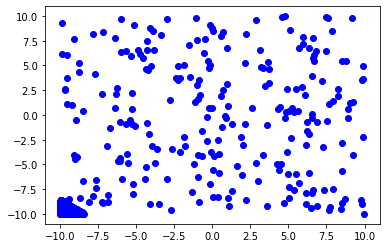

In [8]:
nestsPoints, nestsVal = zip(*nests)
print("vector of nests: ",nests)
x,y = zip(*nestsPoints)
    
print("Best point: ", nestsPoints[0], "  which value is: ", nestsVal[0])
plt.plot(x,y, 'bo')
plt.show()